<a href="https://www.kaggle.com/code/renatakuagowska/titanic-1-202209?scriptVersionId=106720733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Data Analysis

In [2]:
# Load data 

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data.isnull().sum()/len(train_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test_data.isnull().sum()/len(test_data)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Note:

- lack of data : Age (about 20%), Cabin (77%), Embarked and Fare (below 0,1%)
- Age in range: 0,17-80 
- Fare in range : 0-512 


# 2.Visualization
- frequency

In [12]:
def plotone(variable):
    #input : variable (agevs)
    
    varr = train_data[variable]
    varrcounter = varr.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varrcounter.index,varrcounter)
    plt.xticks(varrcounter.index,varrcounter.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: /n {}".format(variable,varrcounter))

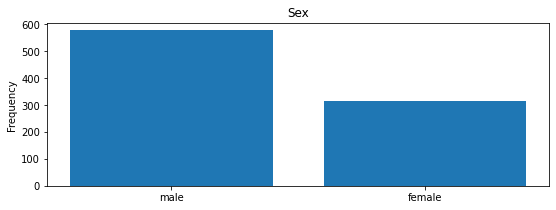

Sex: /n male      577
female    314
Name: Sex, dtype: int64


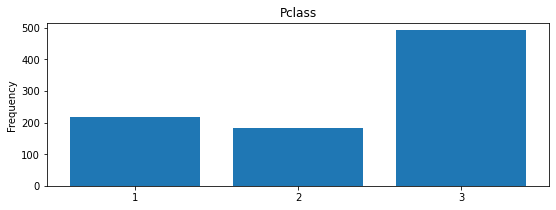

Pclass: /n 3    491
1    216
2    184
Name: Pclass, dtype: int64


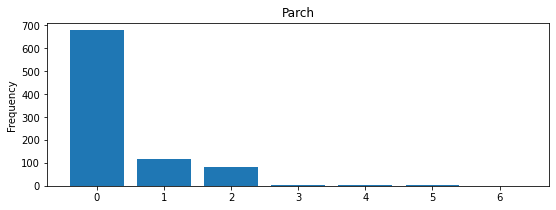

Parch: /n 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


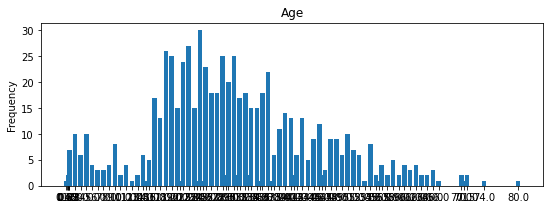

Age: /n 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


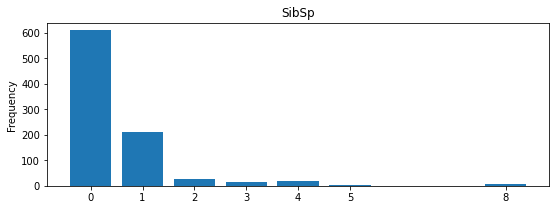

SibSp: /n 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


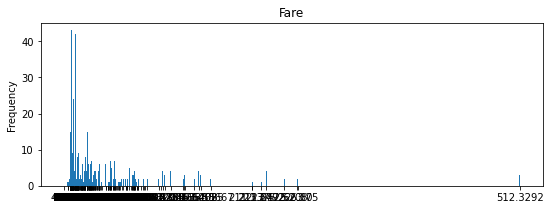

Fare: /n 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


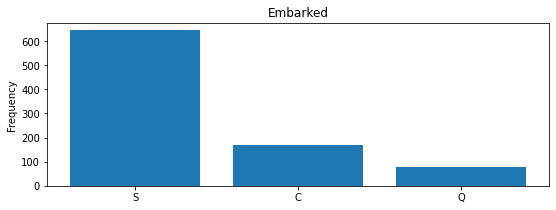

Embarked: /n S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
cate = ["Sex","Pclass","Parch", "Age", "SibSp", "Fare","Embarked"]

for xxx in cate:
    plotone(xxx)

In [14]:
px.histogram(train_data,x='Survived', title='Survived', width =600, height= 400)

Note:
- much more male then female,
- most in class 3
- mostly without parents and child
- most come from S

- Korelacje 

In [15]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

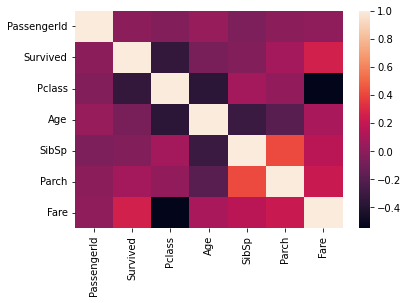

In [16]:
sns.heatmap(train_data.corr())

Note:


- who survived

In [17]:
pd.pivot_table(train_data,index= 'Survived', values = ['Age','SibSp','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


Note:
who had a better chance of survival:
- youngest ? 
- who paid more? 
- if you traveled with your parents?
- in business class?
- no children / with fewer children?

- dane kategoryczne

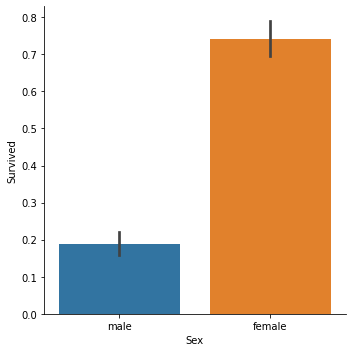

In [18]:
sns.catplot(data=train_data, x='Sex', y='Survived',kind='bar')

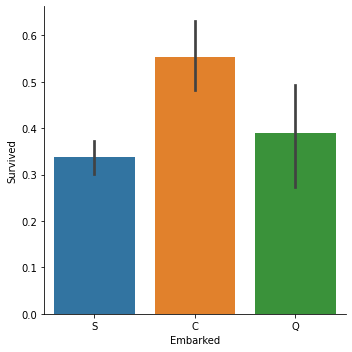

In [19]:
sns.catplot(data=train_data, x='Embarked', y='Survived',kind='bar')

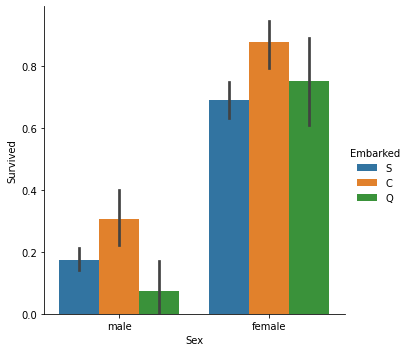

In [20]:
sns.catplot(data=train_data, x='Sex', y='Survived',kind='bar', hue='Embarked')

In [21]:
print(pd.pivot_table(train_data, index ='Survived', columns = 'Sex', values ='Ticket',aggfunc= 'count'  ))

Sex       female  male
Survived              
0             81   468
1            233   109


In [22]:
print(pd.pivot_table(train_data, index ='Survived', columns = 'Embarked', values ='Ticket',aggfunc= 'count'  ))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [23]:
y= train_data['Survived'].values
y.shape

(891,)

Wnioski 
1.  -  Kobiety mialy większe szanse na przeżycie 
    - większe szanse mieli również ci z C = Cherbourg
co ciekawe mężczyżni z C = Cherbourg mieli nieproporcionalnie mniejsze szanse 

2. Na chwilę obecną mało ciekawe są wykresy dla Ticket i Cabin - feature enginiering

# Feature Enginiering

In [24]:
# Merging data 

train_data=train_data.drop(['Survived'], axis=1)
concated_data=pd.concat([train_data,test_data],ignore_index=True)
print(concated_data)

      PassengerId  Pclass                                               Name  \
0               1       3                            Braund, Mr. Owen Harris   
1               2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2               3       3                             Heikkinen, Miss. Laina   
3               4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4               5       3                           Allen, Mr. William Henry   
...           ...     ...                                                ...   
1304         1305       3                                 Spector, Mr. Woolf   
1305         1306       1                       Oliva y Ocana, Dona. Fermina   
1306         1307       3                       Saether, Mr. Simon Sivertsen   
1307         1308       3                                Ware, Mr. Frederick   
1308         1309       3                           Peter, Master. Michael J   

         Sex   Age  SibSp  Parch       

Ticket i Cabin nadal nie są zdiagnozowane 

#- Dane Cabin zaczynają się od litery potem liczby. Czy litery oznaczają piętra ? albo konkretną część statku. Można z analizować po literze.
#- Dane biley nie zostaną analizowane 

In [25]:
concated_data['cabin_l'] = concated_data.Cabin.apply(lambda x: str(x)[0])

In [26]:
print(concated_data.cabin_l.value_counts())


n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_l, dtype: int64


Dane godne uwagi szczególnie te z literą D i E,B tam 3 x więcej ludzi przeżyło. ??
Pytanie tylko dlaczego tak dużo jest braków w danych i czy dane te głownie nie pochodzą z informacji od tych co przeżyli ??

# Przetworzenie danych do modelu 

In [27]:
concated_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,n


In [28]:
concated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  cabin_l      1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [29]:
concated_data.isnull().sum()/len(train_data)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.295174
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.001122
Cabin          1.138047
Embarked       0.002245
cabin_l        0.000000
dtype: float64

Braki danych 
1. Embarked
2. Age - braki wypełnione po średniej wieku 
3. Cabin - brak danych będą w tym wypadku nową kategorią 

# Embarked - sprawdzamy jakie mamy dane 

In [30]:
px.histogram(train_data,x='Embarked', title='Embarked')

zdecydowana większość jest S więc tam przypiszemy braki 

In [31]:
concated_data= concated_data.fillna({'Embarked':'S'})

In [32]:
concated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  cabin_l      1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [33]:
px.histogram(train_data,x='Age', title='Age')

In [34]:
concated_data[pd.isnull(concated_data['Age'])]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,n
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,n
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,n
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,n
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,n
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,n
1301,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,n
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,n
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,n


In [35]:
concated_data = concated_data.fillna(train_data.Age.mean())
concated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  cabin_l      1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [36]:
px.histogram(train_data,x='Age', title='Age')

Zadania :
1. Usunąć passengerID, Name, Ticket, Cabin - nie będą brane do analizy 
2. zmienić dane kategoryczne+ sex, embarked, cabin_l
3. stworzyć przedziały dla wieku 
4. stworyzć przedziały dla opłaty 


In [37]:
concated_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.699118,S,n
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


In [38]:
#1
concated_data = concated_data.drop(['Name','Ticket','Cabin','Age','Fare'],axis=1)

concated_data.head(2)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,cabin_l
0,1,3,male,1,0,S,n
1,2,1,female,1,0,C,C


In [39]:
# 2

sex_mapping = {"male": 0, "female": 1}
concated_data['Sex']= concated_data['Sex'].map(sex_mapping)


emb_mapping = {"S": 0, "C": 1,"Q":2}
concated_data['Embarked']= concated_data['Embarked'].map(emb_mapping)


cab_mapping = {"A": 0, "B": 1,"C":2, "D": 3, "E": 4,"F":5, "G": 6, "T": 7,"n":8}
concated_data['cabin_l']= concated_data['cabin_l'].map(cab_mapping)


concated_data.head()


,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,cabin_l
0,1,3,0,1,0,0,8
1,2,1,1,1,0,1,2
2,3,3,1,0,0,0,8
3,4,1,1,1,0,0,2
4,5,3,0,0,0,0,8


In [40]:
concated_data = pd.get_dummies(concated_data,columns=['Pclass','Sex','SibSp','Parch','Embarked', 'cabin_l'])
concated_data

,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_2,cabin_l_0,cabin_l_1,cabin_l_2,cabin_l_3,cabin_l_4,cabin_l_5,cabin_l_6,cabin_l_7,cabin_l_8
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1305,1306,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1306,1307,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1307,1308,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
X = concated_data[['PassengerId','Pclass_1','Pclass_2','Pclass_3','Sex_0','Sex_1','SibSp_0','SibSp_1','SibSp_2','SibSp_3','SibSp_4','Embarked_2',
                 'cabin_l_0','cabin_l_1','cabin_l_2','cabin_l_3','cabin_l_4','cabin_l_5','cabin_l_6','cabin_l_7','cabin_l_8']].values
print(X[0:5,:])

[[1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [2 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [3 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [4 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [5 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]


In [42]:
test_data=X[891:]
X=X[:891]
print(X.shape,test_data.shape)


(891, 21) (418, 21)


In [43]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [44]:
print(x_train[:3])

[[ 36   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   1]
 [ 47   0   0   1   1   0   0   1   0   0   0   1   0   0   0   0   0   0
    0   0   1]
 [454   1   0   0   1   0   0   1   0   0   0   0   0   0   1   0   0   0
    0   0   0]]


In [45]:
print(x_test[:3])

[[863   1   0   0   0   1   1   0   0   0   0   0   0   0   0   1   0   0
    0   0   0]
 [224   0   0   1   1   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   1]
 [ 85   0   1   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   1]]


In [46]:
print(y_train[:3])

[0 0 1]


In [47]:
print(y_test[:3])

[1 0 1]


In [48]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(668, 21) (223, 21) (668,) (223,)


# 

# Models 
1. Klasyfikator Bayesowski - Naive Bayes
2. Las losowy - Random Forest 


In [49]:
# 1 Naive Bayes



In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [51]:
model.score(x_train,y_train)

0.7754491017964071

In [52]:
x_test.shape

(223, 21)

In [53]:
y_pred_NB = model.predict(test_data)
y_pred_NB.shape

(418,)

In [54]:
df= pd.DataFrame(test_data,columns=['PassengerId',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df

,PassengerId,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,892,0,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,893,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,895,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,1,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
415,1307,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 2 las losowy - Random forest



In [55]:
classifier = RandomForestClassifier(n_estimators=25, random_state=42)

classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [56]:
classifier.score(x_train,y_train)

0.9940119760479041

In [57]:
y_pred_RF= classifier.predict(test_data)

In [58]:
submission = pd.DataFrame({"PassengerId": df.PassengerId, "Survived": y_pred_RF})
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
